In [35]:
# 사용할 데이터의 형태
data_type = '8'      # '1' : summarize X,개별 기사   '2' : summarize X,날짜별 기사
                    # '3' : summarize O,개별 기사   '4' : summarize O,날짜별 기사
normalized = 'done' # 'done' : 데이터 행별 normalize한 데이터     'not' : 데이터 행별 normalize 안한 데이터
erased_word = ''    # 제거된 단어 형태
num_word = '5000'   # 사용할 단어 수

# 돌려볼 모델의 구조
first_layer = 3000   # 모델의 첫 번째 레이어 수
second_layer = 1000  # 모델의 두 번째 레이어 수
ep = 60             # 모델의 에포크 수
ba = 1024            # 모델의 배치 사이즈

In [25]:
# 생성된 training, test의 x,y값을 pickle의 형태로 저장
import pickle
import os
path = os.getcwd()+'/pickles/'
if erased_word != '':
    erased_word = '_'+erased_word
with open(path+data_type+'train_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_x = pickle.load(f)
with open(path+data_type+'train_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_y = pickle.load(f)
with open(path+data_type+'train2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_x = pickle.load(f)
with open(path+data_type+'train2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_y = pickle.load(f)
with open(path+data_type+'test_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_x = pickle.load(f)
with open(path+data_type+'test_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_y = pickle.load(f)
with open(path+data_type+'test2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_x = pickle.load(f)
with open(path+data_type+'test2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_y = pickle.load(f)

In [26]:
# numpy 사용하여 float로 바꾸어주는 과정
import numpy as np
x_train = np.asarray(train_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [36]:
# DNN 학습 모델
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
n =len(x_train[0])
model.add(layers.Dense(first_layer,activation='relu'))#실제 쓸 단어갯수

model.add(layers.Dense(second_layer,activation='relu'))

model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss = losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

#hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_test,y_test),callbacks=callbacks,batch_size=ba)
hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_test,y_test),batch_size=ba)

# 모델의 예측값을 튜플로 반환하는 함수
def predict(x):
    data = np.expand_dims(np.asarray(x).astype('float32'),axis=0)
    result = model.predict(data)
    return tuple(result[0])


Epoch 1/60
10/10 [==============================] - 4s 417ms/step - loss: 1.0890 - categorical_accuracy: 0.3798 - val_loss: 1.0844 - val_categorical_accuracy: 0.3816
Epoch 2/60
10/10 [==============================] - 4s 385ms/step - loss: 1.0762 - categorical_accuracy: 0.4073 - val_loss: 1.0782 - val_categorical_accuracy: 0.3830
Epoch 3/60
10/10 [==============================] - 4s 398ms/step - loss: 1.0518 - categorical_accuracy: 0.4371 - val_loss: 1.0669 - val_categorical_accuracy: 0.4276
Epoch 4/60
10/10 [==============================] - 4s 398ms/step - loss: 1.0348 - categorical_accuracy: 0.4460 - val_loss: 1.1084 - val_categorical_accuracy: 0.3638
Epoch 5/60
10/10 [==============================] - 4s 396ms/step - loss: 1.0125 - categorical_accuracy: 0.4765 - val_loss: 1.0467 - val_categorical_accuracy: 0.4539
Epoch 6/60
10/10 [==============================] - 4s 402ms/step - loss: 0.9865 - categorical_accuracy: 0.5223 - val_loss: 1.0441 - val_categorical_accuracy: 0.4550
Epoc

10/10 [==============================] - 4s 387ms/step - loss: 0.0572 - categorical_accuracy: 0.9814 - val_loss: 2.0050 - val_categorical_accuracy: 0.5197
Epoch 51/60
10/10 [==============================] - 4s 427ms/step - loss: 0.3254 - categorical_accuracy: 0.9050 - val_loss: 2.5983 - val_categorical_accuracy: 0.4677
Epoch 52/60
10/10 [==============================] - 4s 412ms/step - loss: 0.1347 - categorical_accuracy: 0.9572 - val_loss: 1.7734 - val_categorical_accuracy: 0.5239
Epoch 53/60
10/10 [==============================] - 4s 408ms/step - loss: 0.0516 - categorical_accuracy: 0.9844 - val_loss: 1.9409 - val_categorical_accuracy: 0.5207
Epoch 54/60
10/10 [==============================] - 4s 411ms/step - loss: 0.0616 - categorical_accuracy: 0.9753 - val_loss: 2.1977 - val_categorical_accuracy: 0.5163
Epoch 55/60
10/10 [==============================] - 4s 394ms/step - loss: 1.0687 - categorical_accuracy: 0.7885 - val_loss: 1.6368 - val_categorical_accuracy: 0.5249
Epoch 56/6

In [5]:
# 모든 날짜의 예측값들을 합치기 위한 튜플의 합 함수

def sum_tuple(a,b):
    return (a[0]+b[0],a[1]+b[1],a[2]+b[2])

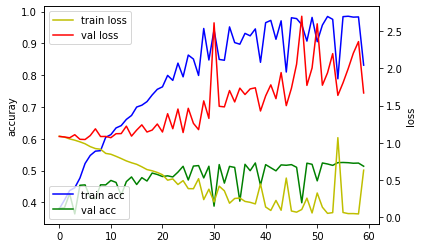

In [37]:
#8
#epoch 60
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

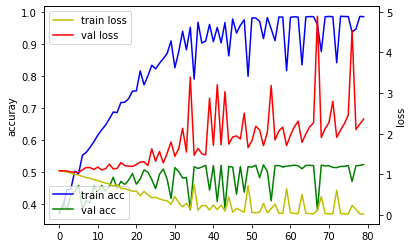

In [34]:
#8
#epoch 80
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

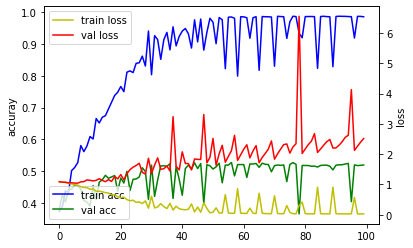

In [28]:
#8
#epoch 100
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [38]:
import re
print('데이터 타입 : '+data_type)
print('단어 갯수 : '+num_word)
print('행당 노말라이즈 : '+ normalized)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)

count = 0
sum_dic = {}
for data in test2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)


#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

데이터 타입 : 8
단어 갯수 : 5000
행당 노말라이즈 : done
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  60 , batch_size :  1024
test 데이터 정확도 :  0.7717647058823529


In [33]:
import re
print('데이터 타입 : '+data_type)
print('단어 갯수 : '+num_word)
print('행당 노말라이즈 : '+ normalized)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)

count = 0
sum_dic = {}
for data in test2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)


#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

데이터 타입 : 8
단어 갯수 : 5000
행당 노말라이즈 : done
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  80 , batch_size :  1024
test 데이터 정확도 :  0.7552941176470588


In [29]:
import re
print('데이터 타입 : '+data_type)
print('단어 갯수 : '+num_word)
print('행당 노말라이즈 : '+ normalized)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)

count = 0
sum_dic = {}
for data in test2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)


#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

데이터 타입 : 8
단어 갯수 : 5000
행당 노말라이즈 : done
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  100 , batch_size :  1024
test 데이터 정확도 :  0.7694117647058824
